In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import category_encoders as ce
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import make_pipeline
from sklearn.inspection import plot_partial_dependence

# Loading Insurance Premiums Data

In [2]:
df = pd.read_csv(r"C:\Users\Jonat\dat-07-26\Homework\Unit3\data\insurance_premiums.csv")
#df.head(5)

# Encoders

In [3]:
te = ce.TargetEncoder(cols=['smoker'], min_samples_leaf=30, smoothing = 4.0)                        #Not working
ohe = ce.OneHotEncoder(cols=['region', 'sex'], verbose=1)     #Not working

#____________________________________________________
#label encoder transform sex, smoker, region columns
#le = LabelEncoder()       #label encoder
#df['sex'] = le.fit_transform(df['sex'])
#df['smoker'] = le.fit_transform(df['smoker'])
#df['region'] = le.fit_transform(df['region'])
#___________________________________________________

#gadient Boosting - Working params gathered from GBM tweaking file
gbm = GradientBoostingRegressor(learning_rate=0.2, n_estimators=610, criterion='mse', max_depth=3,loss='ls',verbose=1)
#pipe = make_pipeline(le, gbm)
pipe = make_pipeline(te, ohe, gbm)
#pipe = make_pipeline(te, ohe, gbm)            #pipe 2 uses Gradient boosting
#print(ohe)
#print(te)
print(pipe)

#print(le)

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['smoker'], min_samples_leaf=30,
                               smoothing=4.0)),
                ('onehotencoder',
                 OneHotEncoder(cols=['region', 'sex'], verbose=1)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(criterion='mse', learning_rate=0.2,
                                           n_estimators=610, verbose=1))])


# Splitting Test, Train n Validation dataset

In [4]:
def split_dataset(df, split_frac=0.2, return_val = True, return_test = False, random_state = 7):
    X = df.drop('charges', axis=1)
    y = df['charges']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_frac, random_state = random_state)
        
    if return_val:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = split_frac, random_state = random_state)

    if return_val and return_test:
        return X_train, y_train, X_val, y_val, X_test, y_test
    
    if return_val:
        return X_train, y_train, X_val, y_val

In [15]:
#train, val, test = create_val_splits(df, return_val=True)
X_train, y_train, X_val, y_val, X_test, y_test = split_dataset(df, split_frac=0.15, return_val=True, return_test=True)

In [17]:
#X_train = pipe[0].fit_transform(X_train, y_train)
#X_train = pipe[1].fit_transform(X_train, y_train)
pipe.fit(X_train, y_train)

C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


      Iter       Train Loss   Remaining Time 
         1   102256642.1871            0.00s
         2    72931377.1199            0.00s
         3    54055736.3726            0.00s
         4    41838212.1640            0.00s
         5    33892658.5239            0.00s
         6    28731502.4608            0.00s
         7    25303075.7351            0.00s
         8    23021394.4124            0.00s
         9    21481144.3399            0.00s
        10    20437692.6031            0.00s
        20    17178486.1657            0.46s
        30    15728312.5920            0.30s
        40    14363132.8994            0.45s
        50    13255384.6020            0.46s
        60    12326695.8071            0.38s
        70    11677359.0208            0.44s
        80    11055474.3202            0.38s
        90     9940971.0122            0.33s
       100     9370268.0711            0.37s
       200     6280329.3670            0.31s
       300     4208598.3116            0.23s
       40

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['smoker'], min_samples_leaf=30,
                               smoothing=4.0)),
                ('onehotencoder',
                 OneHotEncoder(cols=['region', 'sex'], verbose=1)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(criterion='mse', learning_rate=0.2,
                                           n_estimators=610, verbose=1))])

#  Partial dependence for a single column w/ ice lines

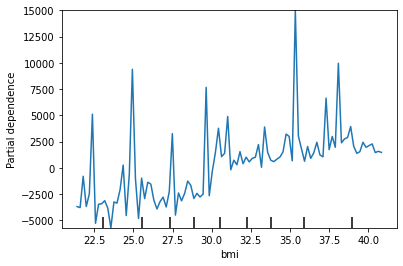

In [7]:
plot_partial_dependence(pipe[2], X_train, ['bmi'], kind='average')

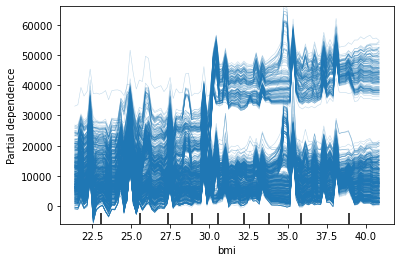

In [8]:
plot_partial_dependence(pipe[2], X_train, ['bmi'], kind='individual')

# Interactions -- between BMI and smoking

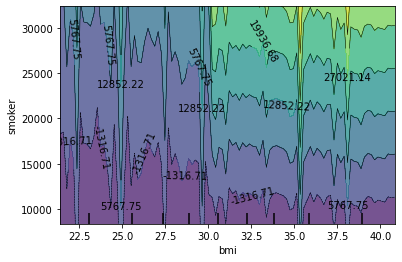

In [159]:
plot_partial_dependence(pipe[2], X_train, [('bmi', 'smoker')]);

In [18]:
pipe.fit(X_train, y_train)    #<-- pipe.fit(X_train, y_train)

C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


      Iter       Train Loss   Remaining Time 
         1   102256642.1871            0.00s
         2    72931377.1199            0.00s
         3    54055736.3726            0.00s
         4    41838212.1640            0.00s
         5    33892658.5239            0.00s
         6    28731502.4608            0.00s
         7    25303075.7351            0.00s
         8    23021394.4124            0.00s
         9    21481144.3399            0.00s
        10    20437692.6031            0.00s
        20    17178486.1657            0.46s
        30    15728312.5920            0.30s
        40    14363132.8994            0.45s
        50    13255384.6020            0.35s
        60    12326695.8071            0.43s
        70    11677359.0208            0.36s
        80    11055474.3202            0.31s
        90     9940971.0122            0.36s
       100     9370268.0711            0.32s
       200     6280329.3670            0.29s
       300     4208598.3116            0.22s
       40

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['smoker'], min_samples_leaf=30,
                               smoothing=4.0)),
                ('onehotencoder',
                 OneHotEncoder(cols=['region', 'sex'], verbose=1)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(criterion='mse', learning_rate=0.2,
                                           n_estimators=610, verbose=1))])

In [19]:
pipe.predict(X_val)    #<-- pipe.predict

array([ 1.74478380e+03,  9.96730837e+03,  1.01592351e+04,  1.71894272e+04,
        1.59808265e+04,  2.93847649e+03,  1.33797361e+04,  1.00237250e+04,
        1.03162939e+04,  8.30645287e+03,  8.33879240e+03,  9.14753603e+03,
        6.74008680e+03,  3.16844425e+04,  2.18835450e+04,  1.87494412e+04,
        4.82665246e+03,  4.18369169e+04,  3.48502925e+04,  7.59553824e+03,
        3.58524712e+04,  1.21151476e+04,  1.28087796e+04,  7.10949705e+03,
        1.45910866e+04,  3.87075082e+04,  8.28349756e+03,  1.11014764e+04,
        6.90056806e+03,  8.04315725e+03,  6.19259218e+03,  8.14146351e+03,
        2.30038371e+04,  1.85213675e+04,  1.37699912e+03,  1.24414302e+04,
       -1.51050403e+03,  1.14313960e+04,  3.80163478e+04,  7.05346864e+03,
        3.25372126e+03,  2.61980308e+04,  1.14748782e+04,  6.59525962e+03,
        4.60504499e+04,  1.70633728e+04,  7.32256751e+03,  5.18083079e+04,
        3.73594405e+03,  3.22623247e+03,  1.20284414e+04,  1.01873661e+04,
        4.05158847e+04,  

## BaseLine score

In [20]:
pipe.score(X_val, y_val)      #<-- pipe.score

0.797301957491361

## GBM model already robust from the gbm_tweaking_params file
### values gathered from gbm_tweaking_params file
# Combining training and validation datasets

In [21]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

In [22]:
pipe.fit(X_train, y_train)

C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


      Iter       Train Loss   Remaining Time 
         1   101301702.8932            0.00s
         2    72080191.6524            0.00s
         3    53293392.7717            1.62s
         4    41153601.7961            1.21s
         5    33301603.0060            0.97s
         6    28147880.5216            0.80s
         7    24782921.4434            0.69s
         8    22522308.6631            0.60s
         9    21023017.1381            0.53s
        10    19962012.2337            0.48s
        20    16906246.1754            0.47s
        30    15702045.2784            0.31s
        40    14615721.4279            0.45s
        50    13669047.9607            0.36s
        60    13109694.9389            0.43s
        70    12420934.9937            0.49s
        80    11855362.1374            0.42s
        90    11120873.0492            0.45s
       100    10568971.6355            0.40s
       200     7021033.0786            0.34s
       300     5230266.3469            0.26s
       40

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['smoker'], min_samples_leaf=30,
                               smoothing=4.0)),
                ('onehotencoder',
                 OneHotEncoder(cols=['region', 'sex'], verbose=1)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(criterion='mse', learning_rate=0.2,
                                           n_estimators=610, verbose=1))])

In [23]:
pipe.score(X_test, y_test)

0.789485151357991